In [ ]:
#Import der erforderlichen Module
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Sequential
from collections import deque

Der folgende Code ist von diesen Quellen inspiriert:
- https://huggingface.co/learn/deep-rl-course/unit2/hands-on?fw=pt

In [ ]:
#Initalisierung der Variablen

#Umgebung
env = gym.make("Taxi-v3", render_mode="rgb_array")
state_size = env.observation_space.n
action_size = env.action_space.n
gamma = 0.95

# Training Parameter
episodes = 350        # Mehr Episoden ohne externe Rechenleistung nicht möglich
learning_rate = 0.7
batch_size = 32
memory_buffer = deque(maxlen=400)

# Evaluation Parameter
reward_lst = []
loss_history = []

# Exploration Parameter
max_epsilon = 1.0
min_epsilon = 0.05
decay_rate = 0.001
exploration_rate = 1.0

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Der folgende Code ist von diesen Quellen inspiriert:
- https://github.com/hamedmokazemi/DeepQLearning_FrozenLake_1
- https://github.com/keon/deep-q-learning/tree/master

In [ ]:
# Erstellen des DQN-Agenten
class DQN_Agent:
    def __init__(self, state_size, action_size, memory_buffer, learning_rate, exploration_rate, min_epsilon, max_epsilon, decay_rate, gamma):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = memory_buffer
        self.learning_rate = learning_rate
        self.epsilon = exploration_rate
        self.min_eps = min_epsilon
        self.max_eps = max_epsilon
        self.eps_decay = decay_rate
        self.gamma = gamma
        self.model = self.create_model()

    def create_model(self):
        model = Sequential()
        model.add(Dense(64, input_dim=self.state_size, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def memorize(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values)

    def update_epsilon(self, e):
        self.epsilon = (self.max_eps - self.min_eps) * np.exp(-self.eps_decay * e) + self.min_eps

    def replay(self,batch_size, e):
      mini_batch = random.sample(self.memory, batch_size)
      for next_state, reward, done, state, action in mini_batch:
          target= reward
          if not done:
              target=reward + self.gamma* np.amax(self.model.predict(next_state))
          target_f= self.model.predict(state)
          target_f[0][action]= target
          self.model.fit(state, target_f, epochs=1, verbose=0)

      if self.epsilon > self.min_eps:
          self.update_epsilon(e)
    
    # Trainigsschleife des DQN-Agenten
    def train(self, episodes, env):
        global reward_lst
        for e in range(episodes):
            state = env.reset()
            #state_vector = [0]*state_size
            state_vector = np.zeros(state_size)
            state_vector[state] = 1
            state= np.reshape(state_vector, [1, state_size])
            reward = 0
            done = False
            while not done:
                act = DQN_Agent.act(state)
                next_state, reward, done, info = env.step(act)
                #next_state_vector = [0]*state_size
                next_state_vector = np.zeros(state_size)
                next_state_vector[next_state] = 1
                next_state = np.reshape(next_state_vector, [1, state_size])
                DQN_Agent.memorize(next_state, reward, done, state, act)
                state = next_state
                if done:
                  print(f'Episode: {e+1:4}/{episodes} , Reward: {reward}')
                  break
            reward_lst.append(reward)

            if len(DQN_Agent.memory)> batch_size:
              DQN_Agent.replay(batch_size, e)


In [ ]:
# Übergabe der Parameter
DQN_Agent = DQN_Agent(state_size, action_size, memory_buffer, learning_rate, exploration_rate, min_epsilon, max_epsilon, decay_rate, gamma)

# Training des Agenten
DQN_Agent.train(episodes, env)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 31ms/step
Episode:  309/350 , Reward: -1
1/1 [==============================] - 0s 42ms/step
Episode:  310/350 , Reward: -10
1/1 [==============================] - 0s 26ms/step
Episode:  311/350 , Reward: -10
1/1 [==============================] - 0s 22ms/step
Episode:  312/350 , Reward: -1
1/1 [==============================] - 0s 23ms/step
Episode:  313/350 , Reward: -1
1/1 [==============================] - 0s 26ms/step
Episode:  314/350 , Reward: -10
1/1 [==============================] - 0s 40ms/step
Episode:  315/350 , Reward: -1
1/1 [==============================] - 0s 22ms/step
Episode:  316/350 , Reward: -1
1/1 [==============================] - 0s 22ms/step
Episode:  317/350 , Reward: -1
1/1 [==============================] - 0s 26ms/step
Episode:  318/350 , Reward: -10
1/1 [==============================] - 0s 21ms/step
Episode:  319/350 , Reward: -1
1/1 [===========================

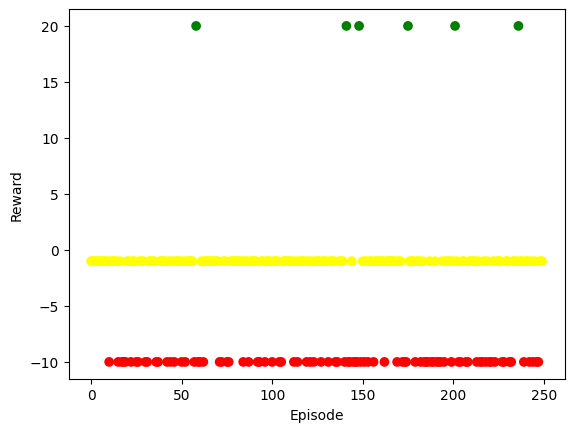

In [ ]:
# Erzeugen des Index für die X-Achse und festlegen von verschiedenen Farben
episode = range(len(reward_lst))
colors = ['green' if reward > 0 else 'yellow' if reward == -1 else 'red' for reward in reward_lst]

# Erzeugen der Scatterplots
plt.scatter(episode, reward_lst, color=colors)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()